# Top 100 Words Closest to "Queer" for Mansfield

In [55]:
import gensim
import gensim.models
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os
from gensim import corpora
from pprint import pprint
from gensim.test.utils import datapath
from gensim import utils
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

In [56]:
from random import choices
from scipy.spatial.distance import cosine
import numpy as np

In [74]:
# Save the model
#model.save("mansfield_word2vec.model")

In [6]:
# Load the model
#model = gensim.models.Word2Vec.load("mansfield_word2vec.model")

In [57]:
def paragraphize(linelist): 
    paragraphlist = []
    sentence = []
    scount = 0
    for line in linelist:
        words = line.strip().split()
        for w in words:
            if not w.endswith('.'):
                sentence.append(w)
            elif scount < 2:
                sentence.append(w)
                scount += 1
            else:
                scount = 0
                sentence.append(w)
                stext = ' '.join(sentence)
                sentence = []
                paragraphlist.append(stext)
    print(len(linelist), len(paragraphlist))
    
    return paragraphlist

In [100]:
file = open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\mansfieldcorpus.txt', 'r', encoding = 'latin-1')
data = file.read()
words = data.split()

print('Number of words in text file :', len(words))

Number of words in text file : 239166


In [61]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\mansfieldcorpus.txt', encoding = 'latin-1') as f:
    mlines = f.readlines()


In [101]:
words =[]
count = 0
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\mansfieldcorpus.txt', encoding = 'latin-1') as f:
    mlines = f.readlines()
    words = set(mlines)
    count =len(words)

print(count)

20003


In [62]:
mparagraphs = paragraphize(mlines)

26691 5160


In [63]:
for i in range(1):
    msample = choices(mparagraphs, k = len(mparagraphs))
    class MyCorpus:
            def __iter__(self):
                global msample    
                for line in msample:
                    yield gensim.utils.simple_preprocess(line)

    sentences = MyCorpus()


In [65]:
%%time
model = gensim.models.Word2Vec(sentences, iter=200)

Wall time: 1min 23s


In [66]:
len(model.wv.vocab)

3833

In [67]:
vector = model.wv['queer']  # get numpy vector of a word
vector
sims = model.wv.most_similar('queer', topn=100)  # get other similar words
sims

[('stupid', 0.43232157826423645),
 ('sort', 0.3334119915962219),
 ('wretched', 0.32295262813568115),
 ('herself', 0.3224021792411804),
 ('desperate', 0.28772538900375366),
 ('turning', 0.27528244256973267),
 ('suddenly', 0.2749164402484894),
 ('wicked', 0.27391359210014343),
 ('cared', 0.27367913722991943),
 ('claws', 0.2719717025756836),
 ('weak', 0.27143287658691406),
 ('completely', 0.2705729007720947),
 ('stealthily', 0.26978600025177),
 ('again', 0.26913437247276306),
 ('lovely', 0.2640908658504486),
 ('idiotic', 0.26391926407814026),
 ('fluttering', 0.2626712918281555),
 ('bodice', 0.26213058829307556),
 ('isâ', 0.26004263758659363),
 ('faint', 0.2561171352863312),
 ('warmly', 0.2541009783744812),
 ('incredible', 0.25375640392303467),
 ('emmie', 0.2513095736503601),
 ('delicate', 0.250262588262558),
 ('chill', 0.24936333298683167),
 ('dreadful', 0.2479519546031952),
 ('pins', 0.24458611011505127),
 ('dim', 0.24359744787216187),
 ('couldnâ', 0.24279651045799255),
 ('tremble', 0.24

In [68]:
import pandas as pd
df = pd.DataFrame(sims) # make sims a dataframe
df_new = df.rename(columns={'words': '0', 'similarity score': '1'})

In [69]:
mansfield_queersimilar = df_new[0].tolist()
#mansfield_queersimilar # get top 100 words as a list
mansfield_queersimilar.append('queer')
#add 'queer' to list

### Catagorizing Sentiments from a List of Top 100 Words Closest to Queer

In [70]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liunegative.txt', encoding = 'utf-8') as f:
    negative_words = [x.strip() for x in f.readlines()]
    
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liupositive.txt', encoding = 'utf-8') as f:
    positive_words = [x.strip() for x in f.readlines()]

In [71]:
%matplotlib notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [72]:
#turn my list into a data frame where each row represents an embedding.

vectordict = dict()
for v in mansfield_queersimilar:
    vectordict[v] = model.wv[v]

In [73]:
vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
vectordf.tail(100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
sort,1.325470,-3.518698,-2.643897,0.982934,1.655402,-1.551107,-0.218320,-0.563149,-0.672275,0.636727,...,2.583412,3.642243,0.401813,-2.221361,0.224199,0.543744,-0.615894,2.168772,0.701301,-0.379544
wretched,0.123011,-1.894662,2.076426,1.384552,-2.271087,0.196716,2.508825,1.724650,-2.973650,2.204054,...,0.371591,1.891021,0.281878,-0.337957,1.213609,0.982916,-1.349980,-1.675225,0.880492,0.812261
herself,1.443425,2.692012,-2.073732,2.026029,1.077173,-2.321290,-0.276514,-0.821390,-0.483130,4.168281,...,-1.838456,-3.701162,-5.419160,-0.202787,0.688542,6.593052,-3.005719,3.228213,-1.773952,-3.169846
desperate,-4.513882,0.652802,-1.431886,0.079650,-0.191208,3.893548,0.573155,3.514955,0.484500,2.365355,...,1.078958,-0.721547,0.996760,1.403312,0.849125,1.960465,-0.770999,2.227883,-0.224588,1.538659
turning,0.531647,-4.713463,1.275412,-2.470949,-2.844064,0.080289,-1.342613,0.675443,0.572413,2.084923,...,0.476045,-1.354116,-0.640405,2.113906,-0.006594,-0.329346,0.921880,1.424375,-1.952000,-1.390312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
also,-2.203670,0.771353,3.447076,2.664103,-1.076787,1.073480,0.799105,-1.220919,1.030912,-0.668212,...,1.222088,1.166901,-1.706713,-1.833596,-1.228288,-0.614315,0.205577,-0.669055,1.812542,-0.260143
bell,-2.561161,2.130188,-1.557189,-1.907970,1.421520,0.538725,-3.062068,3.439099,-4.133291,3.522506,...,1.225874,2.616493,-3.718277,-5.190575,-0.080446,2.044754,3.554151,3.201591,-1.286469,-5.217957
depressed,-0.319637,0.216430,-0.543754,0.210803,0.834648,0.265127,-0.695358,2.013793,-1.150344,0.410728,...,-0.294509,1.369401,-0.800541,-0.663838,-0.713401,-0.818564,-0.270132,0.564489,0.545687,-0.303633
dis,1.562709,-2.286920,2.934305,-0.139443,-0.253038,-0.110421,0.749384,1.893296,-0.322213,1.777421,...,-1.403401,0.334586,0.830855,2.002443,-1.597886,1.671219,-1.136639,-1.498785,-0.807430,0.665533


In [74]:
#use dimension-reduction techniques to flatten it into a plane
def vocab2pca(mansfield_queersimilar):
    
    vectordict = dict()
    for v in mansfield_queersimilar:
        vectordict[v] = model.wv[v]
        
    vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
    
    vectorlengths = np.linalg.norm(vectordf, ord = 2, axis = 1)   # normalize vector lengths
    vectordf = vectordf.divide(vectorlengths, axis = 'rows')      # for PCA
    
    pca = PCA(n_components = 2)       
    components = pca.fit_transform(vectordf)                      # perform PCA
    plotframe = pd.DataFrame({'x': components[ : , 0], 'y': components[ : , 1]}, index = mansfield_queersimilar)
    
    return plotframe

In [75]:
plotframe = vocab2pca(mansfield_queersimilar)
plotframe

,x,y
stupid,0.249618,0.081684
sort,0.134619,-0.229204
wretched,-0.025363,0.083998
herself,-0.064622,-0.110285
desperate,-0.064783,0.193556
...,...,...
also,0.033361,0.055432
bell,-0.214014,-0.215682
depressed,0.152051,0.164824
dis,0.042841,0.010445


In [76]:
negativelist_mansfield = [w for w in mansfield_queersimilar if w in negative_words]
#negativelist_mansfield.remove('queer')
positivelist_mansfield = [w for w in mansfield_queersimilar if w in positive_words]
neutrallist_mansfield = [w for w in mansfield_queersimilar if w not in (negative_words + positive_words)]

In [81]:
plotframe_negative_mansfield = vocab2pca(negativelist_mansfield)
plotframe_positive_mansfield = vocab2pca(positivelist_mansfield)
plotframe_neutral_mansfield = vocab2pca(neutrallist_mansfield)
plotframe_negative_mansfield
plotframe_queer_mansfield = plotframe_negative_mansfield[(plotframe_negative_mansfield.index == 'queer')] #save 'queer' in separate dataframe
plotframe_negative_mansfield = plotframe_negative_mansfield.drop(['queer']) #drop 'queer' from plotframe_negative_mansfield
plotframe_negative_mansfield['sentiment']='negative' #add sentiment columns 
plotframe_positive_mansfield['sentiment']='positive'
plotframe_neutral_mansfield['sentiment']='neutral'
plotframe_queer_mansfield['sentiment']='queer'
plotframe_sentiment = pd.concat([plotframe_negative_mansfield,plotframe_positive_mansfield,plotframe_neutral_mansfield,plotframe_queer_mansfield]) #combine dataframes for plot
plotframe_sentiment

,x,y,sentiment
stupid,-0.386476,0.077674,negative
wretched,0.114891,0.317629,negative
desperate,0.004267,-0.116524,negative
wicked,-0.215831,-0.122465,negative
weak,-0.039216,-0.433776,negative
idiotic,-0.334332,0.147381,negative
faint,0.278214,0.037772,negative
chill,0.454079,-0.227283,negative
dreadful,-0.371453,-0.036067,negative
dim,0.349070,0.006885,negative


In [95]:
def plot_the_frame(plotframe_sentiment):    
    plt.figure(figsize = (20, 22))
    color_dict = dict({'positive':'green', 'neutral':'blue','negative':'red','queer':'purple'})
    theplot = sns.scatterplot(x = plotframe_sentiment.iloc[ : , 0], y = plotframe_sentiment.iloc[ : , 1], hue=plotframe_sentiment.iloc[ : , 2], palette=color_dict)
    collabels = plotframe_sentiment.columns.tolist()
    theplot.set(xlabel = collabels[0], ylabel = collabels[1])


    for rownum in range(plotframe_sentiment.shape[0]):
        x = plotframe_sentiment.iloc[rownum, 0]
        y = plotframe_sentiment.iloc[rownum, 1]
        theplot.text(x + 0.003, y + .003, 
        plotframe_sentiment.index[rownum], horizontalalignment='left', 
        size='small', color='black', fontsize=10, weight='semibold')

    plt.title('Sentiments of the Top 100 Words Closest to Queer (Mansfield)', fontsize=15)
    plt.savefig('queersentiment_mansfield_04282022_5.png')
    plt.show()

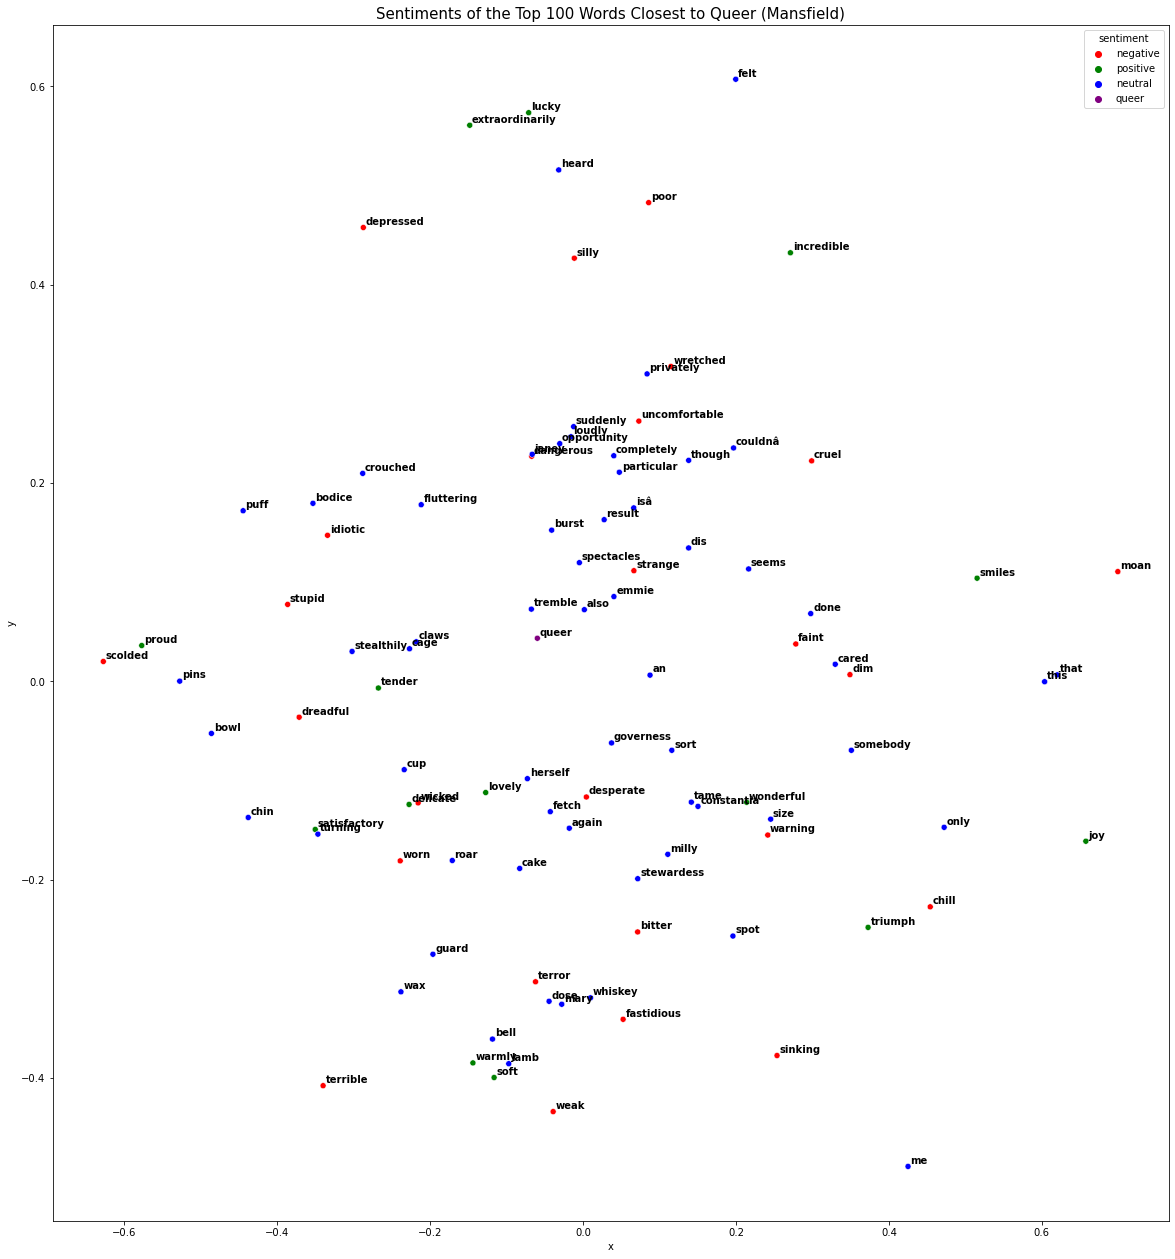

In [96]:
plot_the_frame(plotframe_sentiment)